In [20]:
import pandas as pd
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import glob

In [21]:
# Define the pattern for the split files
input_pattern = "Raw_census_part_*.csv"


# Find all the files matching the pattern
try:
    # Use glob to find the files in order
    csv_files = sorted(glob.glob(input_pattern))

    # Concatenate all the files into one DataFrame
    filtered_df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

 
except Exception as e:
    print(f"An error occurred: {e}")


In [22]:
# List of columns to keep
columns_to_keep = [
    'DGUID', 'GEO_NAME', 'CHARACTERISTIC_ID', 
    'CHARACTERISTIC_NAME', 
    'C1_COUNT_TOTAL'
]

# Filter the DataFrame to keep only these columns
filtered_df = filtered_df[columns_to_keep]




In [23]:
# List of specific CHARACTERISTIC_IDs to keep
characteristic_ids = [1, 2, 3, 40, 318, 632, 2229, 2605, 2606, 2607, 2608, 2609, 2610]

# Filter the DataFrame
filtered_df = filtered_df[filtered_df['CHARACTERISTIC_ID'].isin(characteristic_ids)]

filtered_df


,DGUID,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL
0,2021S05075350001.00,5350001.00,1,"Population, 2021",599.0
1,2021S05075350001.00,5350001.00,2,"Population, 2016",595.0
2,2021S05075350001.00,5350001.00,3,"Population percentage change, 2016 to 2021",0.7
39,2021S05075350001.00,5350001.00,40,Median age of the population,40.4
317,2021S05075350001.00,5350001.00,318,Median total income in 2020 ($),39200.0
...,...,...,...,...,...
1539109,2021S05075350802.02,5350802.02,2606,"Car, truck or van - as a passenger",105.0
1539110,2021S05075350802.02,5350802.02,2607,Public transit,225.0
1539111,2021S05075350802.02,5350802.02,2608,Walked,20.0
1539112,2021S05075350802.02,5350802.02,2609,Bicycle,0.0


In [24]:
# Define a dictionary mapping CHARACTERISTIC_ID to the corresponding value
char_id_mapping = {
    1: 'population, 2021',
    2: 'population, 2016',
    3: 'Population percentage change',
    40: 'Medianage',
    318: 'MedianIncome',
    632: 'Persian languages',
    2229: 'Employmentrate',
    2605: 'drive_as_driver',
    2606: 'drive_as_passenger',
    2607: 'use_public_transit',
    2608: 'walked',
    2609: 'bicycle',
    2610: 'other'
}

# Add a new column with the mapped values
filtered_df['new_column'] = filtered_df['CHARACTERISTIC_ID'].map(char_id_mapping)

filtered_df


,DGUID,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL,new_column
0,2021S05075350001.00,5350001.00,1,"Population, 2021",599.0,"population, 2021"
1,2021S05075350001.00,5350001.00,2,"Population, 2016",595.0,"population, 2016"
2,2021S05075350001.00,5350001.00,3,"Population percentage change, 2016 to 2021",0.7,Population percentage change
39,2021S05075350001.00,5350001.00,40,Median age of the population,40.4,Medianage
317,2021S05075350001.00,5350001.00,318,Median total income in 2020 ($),39200.0,MedianIncome
...,...,...,...,...,...,...
1539109,2021S05075350802.02,5350802.02,2606,"Car, truck or van - as a passenger",105.0,drive_as_passenger
1539110,2021S05075350802.02,5350802.02,2607,Public transit,225.0,use_public_transit
1539111,2021S05075350802.02,5350802.02,2608,Walked,20.0,walked
1539112,2021S05075350802.02,5350802.02,2609,Bicycle,0.0,bicycle


In [25]:
# Pivot the DataFrame to reshape it
reshaped_df = filtered_df.pivot(index=['DGUID'], columns='new_column', values='C1_COUNT_TOTAL')

# Reset the index to flatten the DataFrame
reshaped_df = reshaped_df.reset_index()

reshaped_df


new_column,DGUID,Employmentrate,MedianIncome,Medianage,Persian languages,Population percentage change,bicycle,drive_as_driver,drive_as_passenger,other,"population, 2016","population, 2021",use_public_transit,walked
0,2021S05075350001.00,78.1,39200.0,40.4,0.0,0.7,0.0,95.0,10.0,0.0,595.0,599.0,25.0,30.0
1,2021S05075350002.00,43.8,37600.0,62.0,0.0,-2.6,50.0,30.0,0.0,0.0,620.0,604.0,25.0,15.0
2,2021S05075350003.00,72.5,63200.0,38.0,0.0,-39.0,10.0,120.0,0.0,0.0,749.0,457.0,40.0,0.0
3,2021S05075350004.00,54.3,32800.0,40.0,25.0,-5.7,160.0,500.0,95.0,80.0,6686.0,6306.0,925.0,250.0
4,2021S05075350005.00,58.5,38000.0,36.4,40.0,8.3,120.0,590.0,80.0,70.0,6424.0,6957.0,725.0,310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,2021S05075350378.26,53.6,28800.0,38.8,40.0,2.2,0.0,1235.0,165.0,40.0,4761.0,4867.0,215.0,10.0
581,2021S05075350378.27,58.5,34400.0,37.2,35.0,-4.5,0.0,1385.0,230.0,45.0,5806.0,5547.0,395.0,15.0
582,2021S05075350378.28,49.5,29400.0,41.2,50.0,-3.2,0.0,1475.0,215.0,50.0,7175.0,6946.0,420.0,35.0
583,2021S05075350802.01,56.0,47600.0,43.2,25.0,4.8,0.0,765.0,85.0,65.0,3829.0,4011.0,250.0,15.0


In [26]:


# Load your geojson file into a GeoDataFrame
gdf = gpd.read_file('census_Boundaries.geojson')

# Convert it into a DataFrame if needed (though GeoDataFrame retains spatial information)
df1 = gdf.copy()

# Assuming df is the GeoDataFrame with geometries and DGUID column
# and reshaped_df is the reshaped DataFrame created earlier

# Perform a merge operation using 'DGUID' as the key
merged_df = reshaped_df.merge(df1[['DGUID', 'geometry']], on='DGUID', how='left')

merged_df = merged_df.merge(df1[['DGUID', 'LANDAREA']], on='DGUID', how='left')

merged_df = merged_df.rename(columns={'DGUID': 'CENSUS_ID'})

merged_df['Population_Density (pop/km^2)'] = merged_df['population, 2021'] / merged_df['LANDAREA']

merged_df



,CENSUS_ID,Employmentrate,MedianIncome,Medianage,Persian languages,Population percentage change,bicycle,drive_as_driver,drive_as_passenger,other,"population, 2016","population, 2021",use_public_transit,walked,geometry,LANDAREA,Population_Density (pop/km^2)
0,2021S05075350001.00,78.1,39200.0,40.4,0.0,0.7,0.0,95.0,10.0,0.0,595.0,599.0,25.0,30.0,"MULTIPOLYGON (((-79.342 43.61947, -79.34203 43...",6.8192,87.840216
1,2021S05075350002.00,43.8,37600.0,62.0,0.0,-2.6,50.0,30.0,0.0,0.0,620.0,604.0,25.0,15.0,"MULTIPOLYGON (((-79.38428 43.61915, -79.38429 ...",3.3926,178.034546
2,2021S05075350003.00,72.5,63200.0,38.0,0.0,-39.0,10.0,120.0,0.0,0.0,749.0,457.0,40.0,0.0,"MULTIPOLYGON (((-79.44282 43.63378, -79.44284 ...",0.9455,483.342147
3,2021S05075350004.00,54.3,32800.0,40.0,25.0,-5.7,160.0,500.0,95.0,80.0,6686.0,6306.0,925.0,250.0,"MULTIPOLYGON (((-79.43603 43.63717, -79.43549 ...",0.3404,18525.264395
4,2021S05075350005.00,58.5,38000.0,36.4,40.0,8.3,120.0,590.0,80.0,70.0,6424.0,6957.0,725.0,310.0,"MULTIPOLYGON (((-79.42365 43.64088, -79.42318 ...",0.3764,18482.996812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,2021S05075350378.26,53.6,28800.0,38.8,40.0,2.2,0.0,1235.0,165.0,40.0,4761.0,4867.0,215.0,10.0,"MULTIPOLYGON (((-79.22585 43.83953, -79.22563 ...",1.6267,2991.946886
581,2021S05075350378.27,58.5,34400.0,37.2,35.0,-4.5,0.0,1385.0,230.0,45.0,5806.0,5547.0,395.0,15.0,"MULTIPOLYGON (((-79.15955 43.83172, -79.1565 4...",19.9096,278.609314
582,2021S05075350378.28,49.5,29400.0,41.2,50.0,-3.2,0.0,1475.0,215.0,50.0,7175.0,6946.0,420.0,35.0,"MULTIPOLYGON (((-79.19955 43.82538, -79.19957 ...",2.2278,3117.874136
583,2021S05075350802.01,56.0,47600.0,43.2,25.0,4.8,0.0,765.0,85.0,65.0,3829.0,4011.0,250.0,15.0,"MULTIPOLYGON (((-79.14959 43.81257, -79.14939 ...",2.1742,1844.816484


In [27]:
# Check if there are any NaN values in the entire DataFrame
nan_exists = merged_df.isna().any().any()

# Check for NaN values in each column
nan_per_column = merged_df.isna().sum()

print("Any NaN values in the DataFrame:", nan_exists)
print("\nNumber of NaN values per column:\n", nan_per_column)


Any NaN values in the DataFrame: True

Number of NaN values per column:
 CENSUS_ID                        0
Employmentrate                   2
MedianIncome                     2
Medianage                        0
Persian languages                0
Population percentage change     1
bicycle                          2
drive_as_driver                  2
drive_as_passenger               2
other                            2
population, 2016                 0
population, 2021                 0
use_public_transit               2
walked                           2
geometry                         0
LANDAREA                         0
Population_Density (pop/km^2)    0
dtype: int64


In [28]:
merged_df = merged_df.fillna(0)

In [29]:
merged_df['Population_Density'] = merged_df['population, 2021']/merged_df['LANDAREA']

In [30]:


# Convert merged_df to a GeoDataFrame (if it's not already)
# Ensure 'geometry' column exists
gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

# Save the GeoDataFrame as a GeoJSON file
gdf.to_file('censusdatawithboundaries.geojson', driver='GeoJSON')

print("GeoJSON file saved as 'merged_data.geojson'")


GeoJSON file saved as 'merged_data.geojson'


/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_12031/2914539025.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_intervals)  # 'Set3' is designed for categorical data


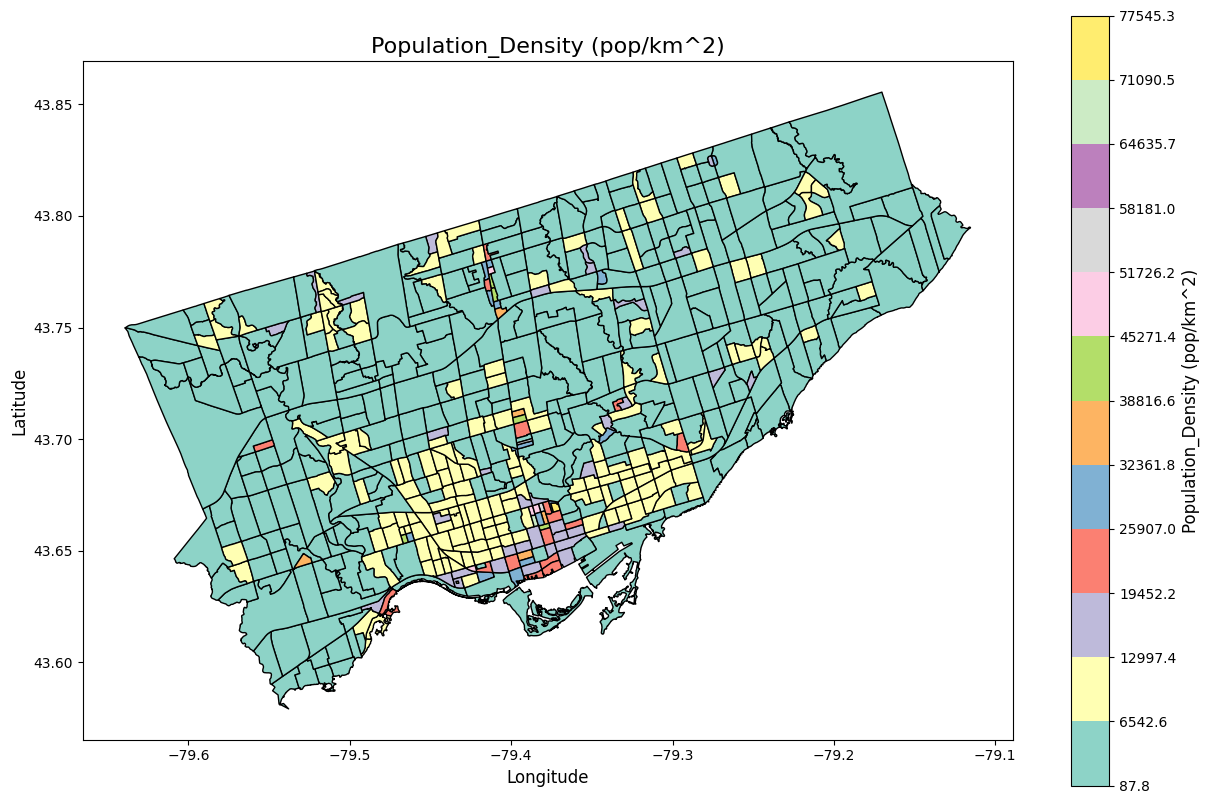

In [31]:


# Load the GeoJSON file
geojson_path = 'censusdatawithboundaries.geojson'  # Replace with the path to your GeoJSON file
gdf = gpd.read_file(geojson_path)

# Define the number of intervals
num_intervals = 12

# Calculate the intervals
min_value = gdf['Population_Density (pop/km^2)'].min()
max_value = gdf['Population_Density (pop/km^2)'].max()
intervals = np.linspace(min_value, max_value, num_intervals + 1)

# Use a qualitative colormap for distinct colors
cmap = plt.cm.get_cmap('Set3', num_intervals)  # 'Set3' is designed for categorical data
norm = BoundaryNorm(intervals, cmap.N)  # Normalize values to intervals

# Plot the GeoJSON data
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, edgecolor='black', color=[cmap(norm(value)) for value in gdf['Population_Density (pop/km^2)']])

# Add a color bar with intervals
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', ticks=intervals)
cbar.set_label('Population_Density (pop/km^2)', fontsize=12)
cbar.ax.set_yticklabels([f'{interval:.1f}' for interval in intervals])  # Customize tick labels

# Customize the plot
ax.set_title('Population_Density (pop/km^2)', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.show()


/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_12031/2301693412.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_intervals)  # 'Set3' is designed for categorical data


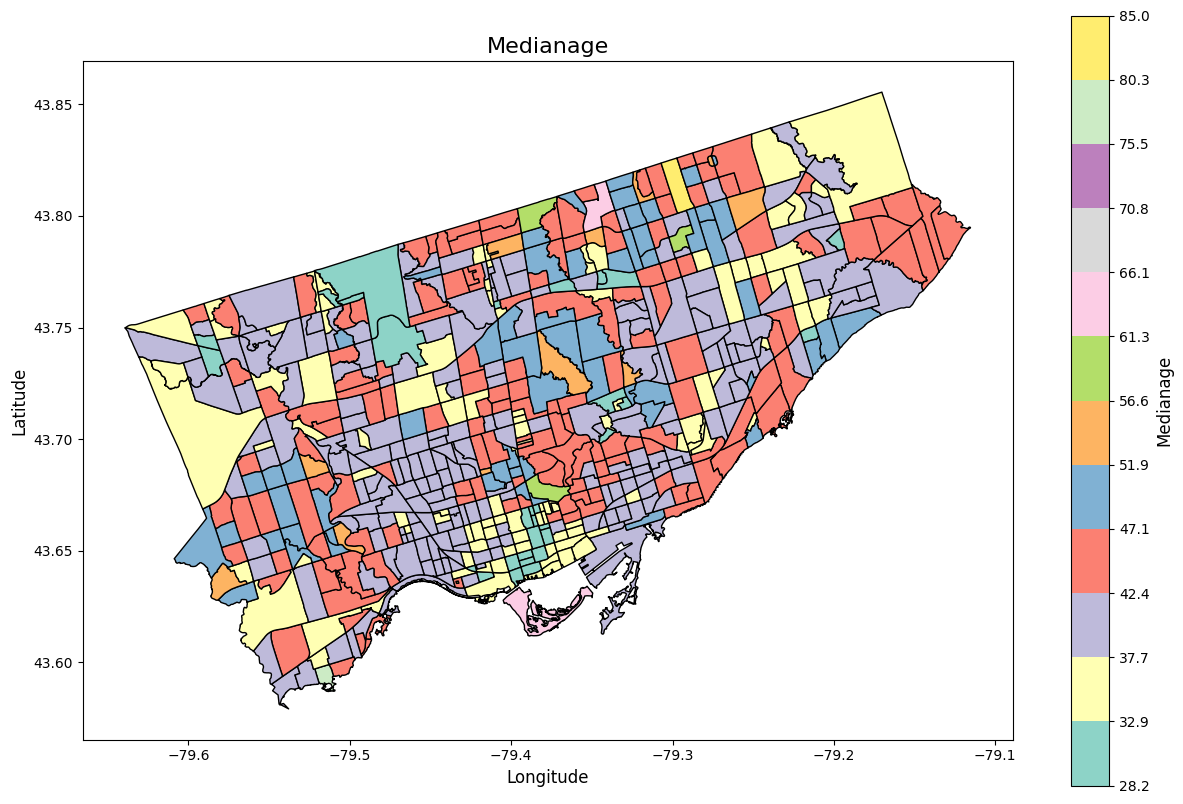

In [32]:


# Define the number of intervals
num_intervals = 12

# Calculate the intervals
min_value = gdf['Medianage'].min()
max_value = gdf['Medianage'].max()
intervals = np.linspace(min_value, max_value, num_intervals + 1)

# Use a qualitative colormap for distinct colors
cmap = plt.cm.get_cmap('Set3', num_intervals)  # 'Set3' is designed for categorical data
norm = BoundaryNorm(intervals, cmap.N)  # Normalize values to intervals

# Plot the GeoJSON data
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, edgecolor='black', color=[cmap(norm(value)) for value in gdf['Medianage']])

# Add a color bar with intervals
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', ticks=intervals)
cbar.set_label('Medianage', fontsize=12)
cbar.ax.set_yticklabels([f'{interval:.1f}' for interval in intervals])  # Customize tick labels

# Customize the plot
ax.set_title('Medianage', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.show()


/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_12031/688655674.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_intervals)  # 'Set3' is designed for categorical data


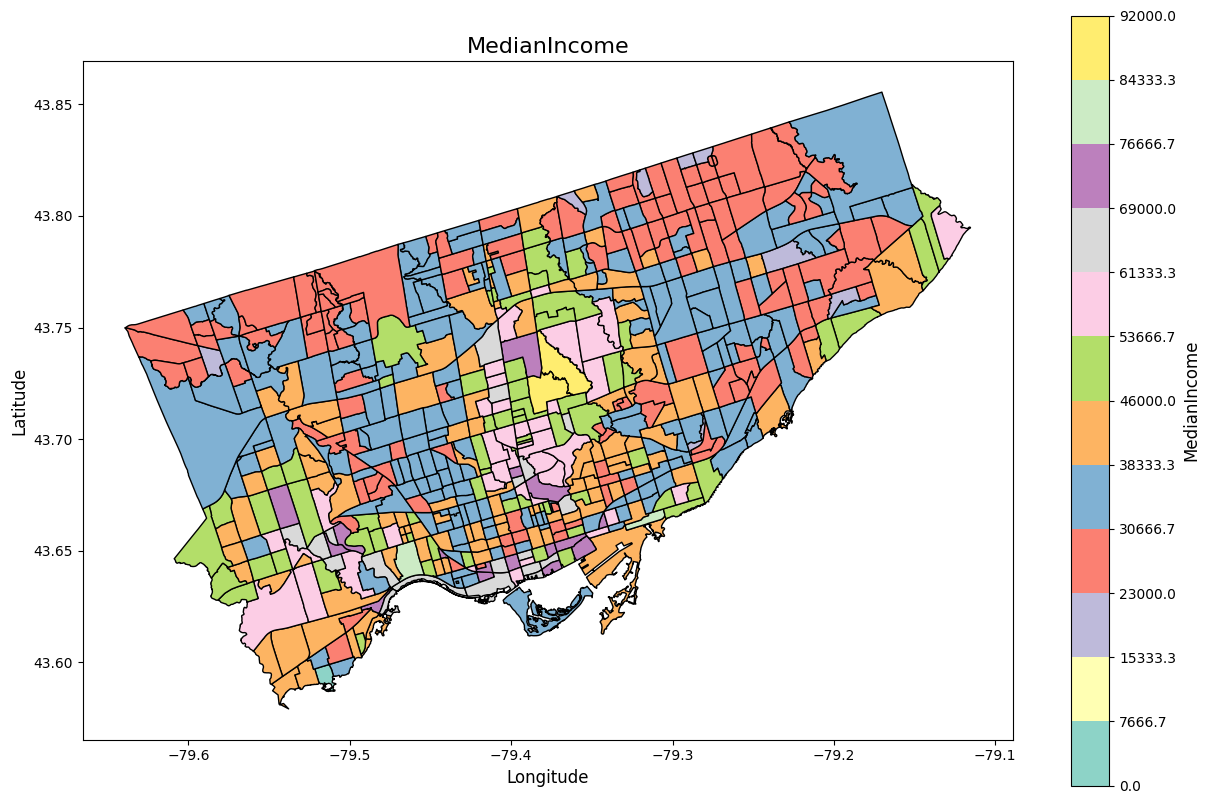

In [33]:


# Define the number of intervals
num_intervals = 12

# Calculate the intervals
min_value = gdf['MedianIncome'].min()
max_value = gdf['MedianIncome'].max()
intervals = np.linspace(min_value, max_value, num_intervals + 1)

# Use a qualitative colormap for distinct colors
cmap = plt.cm.get_cmap('Set3', num_intervals)  # 'Set3' is designed for categorical data
norm = BoundaryNorm(intervals, cmap.N)  # Normalize values to intervals

# Plot the GeoJSON data
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, edgecolor='black', color=[cmap(norm(value)) for value in gdf['MedianIncome']])

# Add a color bar with intervals
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', ticks=intervals)
cbar.set_label('MedianIncome', fontsize=12)
cbar.ax.set_yticklabels([f'{interval:.1f}' for interval in intervals])  # Customize tick labels

# Customize the plot
ax.set_title('MedianIncome', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.show()


/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_12031/1635201689.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_intervals)  # 'Set3' is designed for categorical data


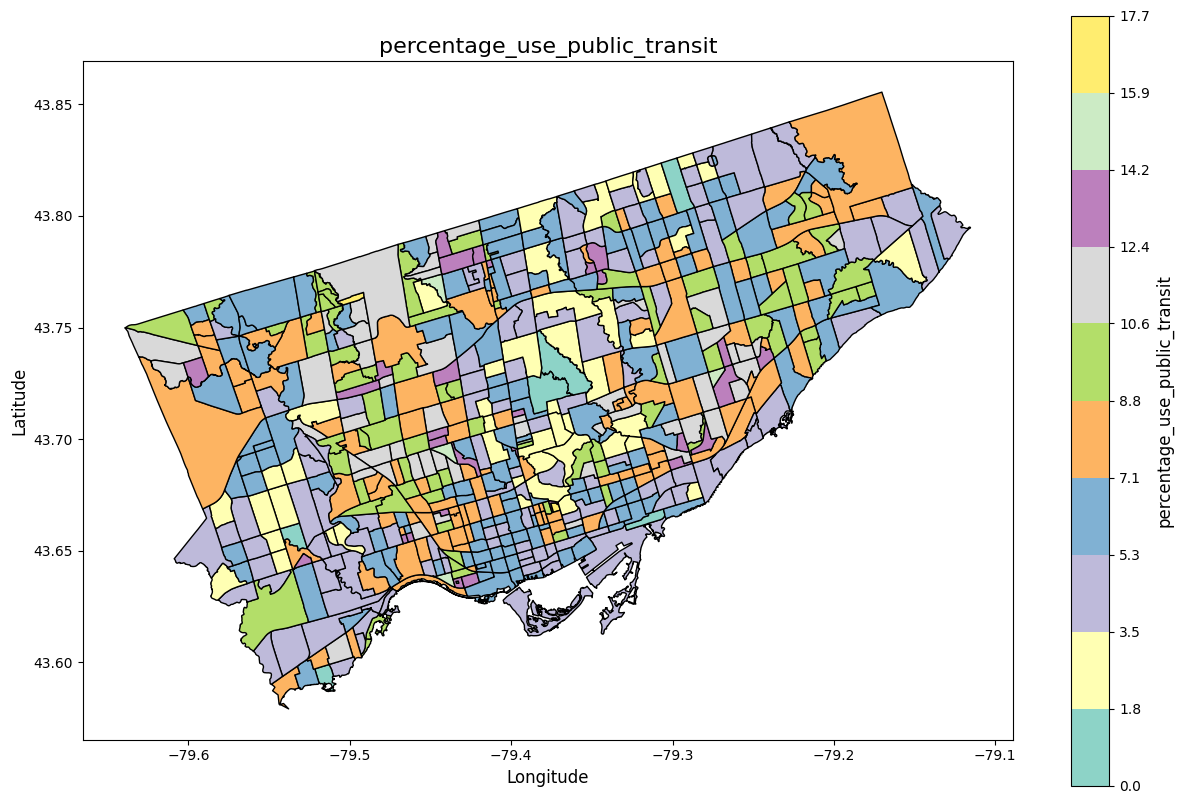

In [34]:


# Define the number of intervals
num_intervals = 10

gdf['percentage_use_public_transit'] = round(100*gdf['use_public_transit']/gdf['population, 2021'],2)


# Calculate the intervals
min_value = gdf['percentage_use_public_transit'].min()
max_value = gdf['percentage_use_public_transit'].max()
intervals = np.linspace(min_value, max_value, num_intervals + 1)

# Use a qualitative colormap for distinct colors
cmap = plt.cm.get_cmap('Set3', num_intervals)  # 'Set3' is designed for categorical data
norm = BoundaryNorm(intervals, cmap.N)  # Normalize values to intervals

# Plot the GeoJSON data
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, edgecolor='black', color=[cmap(norm(value)) for value in gdf['percentage_use_public_transit']])

# Add a color bar with intervals
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', ticks=intervals)
cbar.set_label('percentage_use_public_transit', fontsize=12)
cbar.ax.set_yticklabels([f'{interval:.1f}' for interval in intervals])  # Customize tick labels

# Customize the plot
ax.set_title('percentage_use_public_transit', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.show()


/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_12031/423703407.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_intervals)  # 'Set3' is designed for categorical data


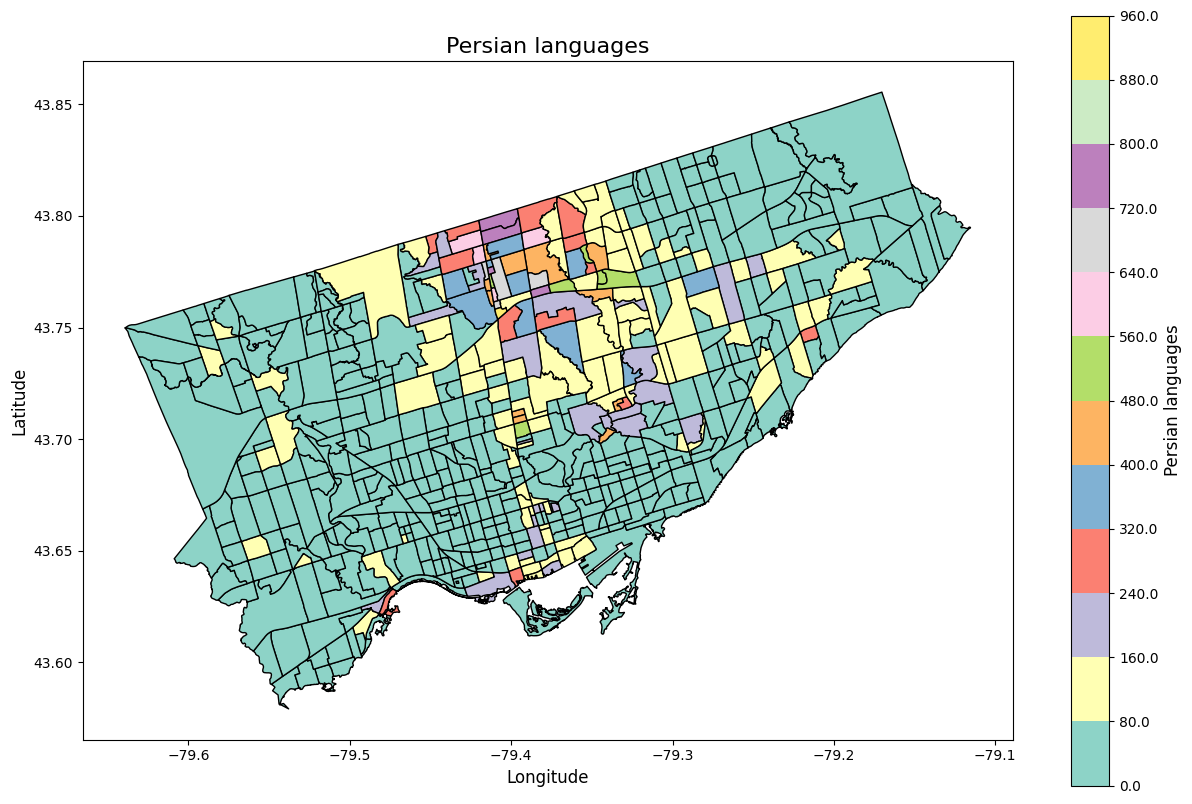

In [35]:



# Define the number of intervals
num_intervals = 12

# Calculate the intervals
min_value = gdf['Persian languages'].min()
max_value = gdf['Persian languages'].max()
intervals = np.linspace(min_value, max_value, num_intervals + 1)

# Use a qualitative colormap for distinct colors
cmap = plt.cm.get_cmap('Set3', num_intervals)  # 'Set3' is designed for categorical data
norm = BoundaryNorm(intervals, cmap.N)  # Normalize values to intervals

# Plot the GeoJSON data
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, edgecolor='black', color=[cmap(norm(value)) for value in gdf['Persian languages']])

# Add a color bar with intervals
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', ticks=intervals)
cbar.set_label('Persian languages', fontsize=12)
cbar.ax.set_yticklabels([f'{interval:.1f}' for interval in intervals])  # Customize tick labels

# Customize the plot
ax.set_title('Persian languages', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.show()
